# Import Library

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings(action='ignore') 

# Load Dataset

### 국토교통부 실거래가 공개시스템 제공-연간 아파트(전월세) 실거래가

In [5]:
df_1 = pd.read_excel('./2018_아파트(전월세)_실거래가.xlsx')
df_2 = pd.read_excel('./2019_아파트(전월세)_실거래가.xlsx') 
df_3 = pd.read_excel('./2020_아파트(전월세)_실거래가.xlsx') 
df_4 = pd.read_excel('./2021_아파트(전월세)_실거래가.xlsx') 
df_5 = pd.read_excel('./2021_아파트(전월세)_실거래가.xlsx') 

### 2018-2022 연간 아파트(전월세) 실거래가 병합(Merge)

In [6]:
df_total = pd.concat([df_1, df_2, df_3, df_4, df_5])

### 전월세구분 Column에서 전세 Filtering 및 Index Initialization

In [7]:
mask = df_total['전월세구분'] == '전세'
df_total = df_total.loc[mask, :]
df_total = df_total.reset_index(drop=True)
df_total.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201804,11,"52,000",0,9,1988,언주로 103
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201805,15,"50,000",0,5,1988,언주로 103
2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201805,24,"56,000",0,9,1988,언주로 103
3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201809,13,"53,000",0,8,1988,언주로 103
4,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201809,17,"50,000",0,3,1988,언주로 103


In [8]:
df_total = df_total.replace(',','', regex=True)
df_total = df_total.replace('  ','', regex=True)
df_total['보증금(만원)'] = df_total['보증금(만원)'].apply(pd.to_numeric,errors='coerce')
df_total['전용면적(㎡)'] = df_total['전용면적(㎡)'].apply(pd.to_numeric,errors='coerce')

### 단위 면적당 전세 가격 계산

In [9]:
df_total['단위면적당전세가'] = df_total['보증금(만원)'] / df_total['전용면적(㎡)']

In [10]:
df_total.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,단위면적당전세가
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201804,11,52000,0,9,1988,언주로 103,668.810289
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201805,15,50000,0,5,1988,언주로 103,643.086817
2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201805,24,56000,0,9,1988,언주로 103,720.257235
3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201809,13,53000,0,8,1988,언주로 103,681.672026
4,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),전세,77.75,201809,17,50000,0,3,1988,언주로 103,643.086817


In [11]:
df_total.shape

(53040, 15)

### 월 평균 전세 보증금에 대한 시계열 그림

In [12]:
df_plot = df_total.groupby(['계약년월']).agg(mean_cost = ('단위면적당전세가', np.mean)).reset_index()

In [13]:
df_plot['계약년월'] = pd.to_datetime(df_plot['계약년월'], format='%Y%m')

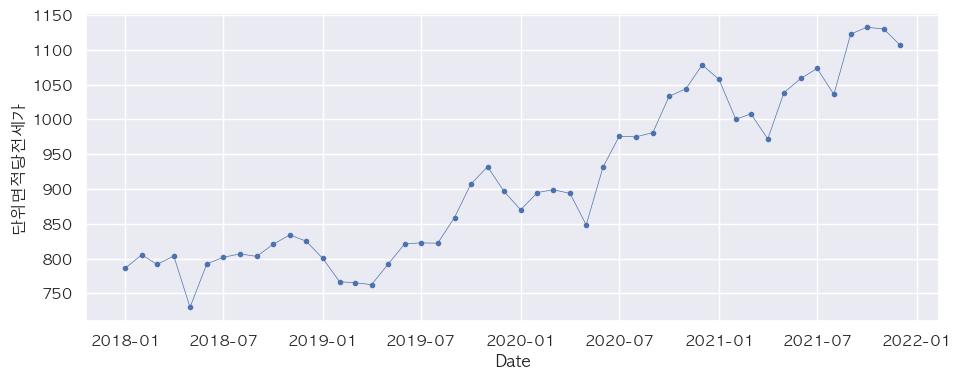

In [14]:
plt.plot(df_plot['계약년월'],df_plot['mean_cost'],marker='.', linestyle='-', linewidth=0.5)
plt.gcf().autofmt_xdate
plt.xlabel('Date')
plt.ylabel('단위면적당전세가')
plt.show()

### 전세 가격(반응변수)과 면적 당 전세 가격의 분포

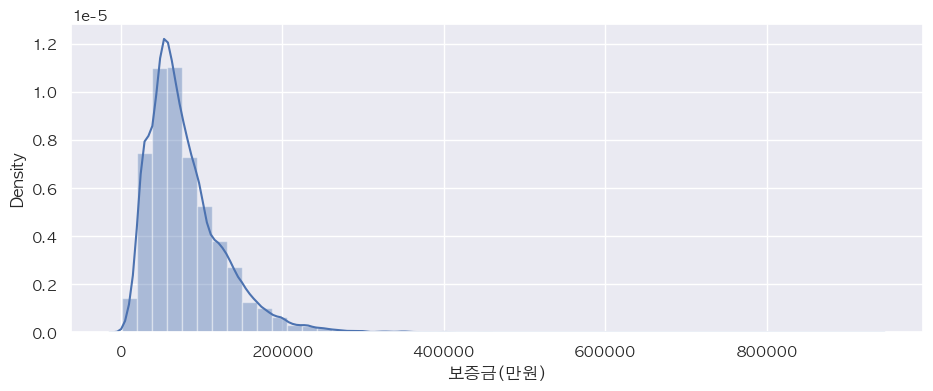

In [15]:
sns.distplot(df_total['보증금(만원)'])
plt.show()

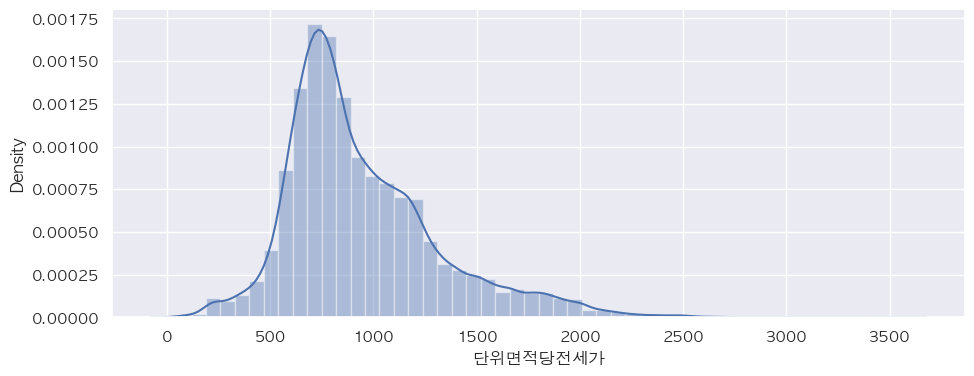

In [16]:
sns.distplot(df_total['단위면적당전세가'])
plt.show()

# 공공 데이터 포털 - API 연동

In [17]:
import requests


encoding = 'lIlqKHjraRXmeKaO7l0VyXhpIGx3wbe8gfPFrEiLt%2Bl7Ze57iOsdffcawVBm1yKjgOOmfyAnHg98VAwkk4kQQQ%3D%3D'
decoding = 'lIlqKHjraRXmeKaO7l0VyXhpIGx3wbe8gfPFrEiLt+l7Ze57iOsdffcawVBm1yKjgOOmfyAnHg98VAwkk4kQQQ=='

url = 'http://apis.data.go.kr/1613000/AptBasisInfoService1/getAphusDtlInfo'
params ={'serviceKey' : decoding, 'kaptCode' : 'A13593908' }

response = requests.get(url, params=params)
content = response.text
print(content)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><item><codeClean>위탁관리</codeClean><codeDisinf>위탁관리</codeDisinf><codeEcon>기타</codeEcon><codeElev>위탁관리</codeElev><codeEmgr>상주선임</codeEmgr><codeFalarm>GR형</codeFalarm><codeGarbage>음식물쓰레기종량제</codeGarbage><codeMgr>위탁관리</codeMgr><codeNet>무</codeNet><codeSec>위탁관리</codeSec><codeStr>철근콘크리트구조</codeStr><codeWsupply>부스타방식</codeWsupply><convenientFacility>관공서(수서경찰서) 병원(삼성의료원) 백화점(롯데백화점,현대백화점) 공원(한마음공원)</convenientFacility><disposalType>분무식,독이식</disposalType><educationFacility>초등학교(대진,양천) 중학교(개원) 고등학교(경기여고)</educationFacility><kaptCcompany>에스더블유엠(주)</kaptCcompany><kaptCode>A13593908</kaptCode><kaptMgrCnt>9</kaptMgrCnt><kaptName>SH공사대치1단지</kaptName><kaptdCccnt>96</kaptdCccnt><kaptdClcnt>8</kaptdClcnt><kaptdDcnt>12</kaptdDcnt><kaptdEcapa>950</kaptdEcapa><kaptdEcnt>12</kaptdEcnt><kaptdPcnt>389</kaptdPcnt><kaptdPcntu>0</kaptdPcntu><kaptdScnt>15</kaptdScn

### 국토교통부_공동주택 상세 정보조회

In [18]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

"""
serviceKey: 서비스키
kaptCode: 단지코드
resultCode: 결과코드
resultMsg: 결과메시지
kaptCode: 단지코드
kaptName: 단지명
codeMgr: 일반관리방식
kaptMgrCnt: 일반관리인원
kaptCcompany: 일반관리 계약업체
codeSec: 경비관리방식
kaptdScnt: 경비관리인원
kaptdSecCom: 경비관리 계약업체
codeClean: 청소관리방식
kaptdClcnt: 청소관리인원
codeGarbage: 음식물처리방법
codeDisinf: 소독관리방식
kaptdDcnt: 소독관리 연간 소독횟수
disposalType: 소독방법
codeStr: 건물구조
kaptdEcapa: 수전용량
codeEcon: 세대전기계약방식
codeEmgr: 전기안전관리자법정선임여부
codeFalarm: 화재수신반방식
codeWsupply: 급수방식
codeElev: 승강기관리형태
kaptdEcnt: 승강기대수
kaptdPcnt: 주차대수(지상)
kaptdPcntu: 주차대수(지하)
codeNet: 주차관제.홈네트워크
kaptdCccnt: CCTV대수
welfareFacility: 부대.복리시설
kaptdWtimebus: 버스정류장 거리
subwayLine: 지하철호선
subwayStation: 지하철역명
kaptdWtimesub: 지하철역 거리
convenientFacility: 편의시설
educationFacility: 교육시설

""" 

xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><codeClean>위탁관리</codeClean><codeDisinf>위탁관리</codeDisinf><codeEcon>기타</codeEcon><codeElev>위탁관리</codeElev><codeEmgr>상주선임</codeEmgr><codeFalarm>GR형</codeFalarm><codeGarbage>음식물쓰레기종량제</codeGarbage><codeMgr>위탁관리</codeMgr><codeNet>무</codeNet><codeSec>위탁관리</codeSec><codeStr>철근콘크리트구조</codeStr><codeWsupply>부스타방식</codeWsupply><convenientFacility>관공서(수서경찰서) 병원(삼성의료원) 백화점(롯데백화점,현대백화점) 공원(한마음공원)</convenientFacility><disposalType>분무식,독이식</disposalType><educationFacility>초등학교(대진,양천) 중학교(개원) 고등학교(경기여고)</educationFacility><kaptCcompany>에스더블유엠(주)</kaptCcompany><kaptCode>A13593908</kaptCode><kaptMgrCnt>9</kaptMgrCnt><kaptName>SH공사대치1단지</kaptName><kaptdCccnt>96</kaptdCccnt><kaptdClcnt>8</kaptdClcnt><kaptdDcnt>12</kaptdDcnt><kaptdEcapa>950</kaptdEcapa><kaptdEcnt>12</kaptdEcnt><kaptdPcnt>389</kaptdPcnt><kaptdPcntu>0</kaptdPcntu><kaptdScnt>15</kaptdScnt><kaptdSecCom>(주)경진이엔지</kaptdSecCom><kaptdWtimebus>5분이내</kaptdWtimebus><kaptdWtimesub>5분이내</kaptdWtimesub><subwayLine>3호선, 분당선, 경의중앙선</subwayLine><subw

In [19]:
row_list = [] 
name_list = []
value_list = [] 

for i in range(0, len(rows)):
    columns = rows[i].find_all()
    for j in range(0,len(columns)):
        if i ==0:
            name_list.append(columns[j].name)
        value_list.append(columns[j].text)
    row_list.append(value_list)
    value_list=[]

In [20]:
pd_apt_detail = pd.DataFrame(row_list, columns=name_list)
pd_apt_detail

,codeClean,codeDisinf,codeEcon,codeElev,codeEmgr,codeFalarm,codeGarbage,codeMgr,codeNet,codeSec,...,kaptdEcnt,kaptdPcnt,kaptdPcntu,kaptdScnt,kaptdSecCom,kaptdWtimebus,kaptdWtimesub,subwayLine,subwayStation,welfareFacility
0,위탁관리,위탁관리,기타,위탁관리,상주선임,GR형,음식물쓰레기종량제,위탁관리,무,위탁관리,...,12,389,0,15,(주)경진이엔지,5분이내,5분이내,"3호선, 분당선, 경의중앙선",대모산,"관리사무소, 노인정, 유치원"


In [21]:
pd_apt_detail.columns

Index(['codeClean', 'codeDisinf', 'codeEcon', 'codeElev', 'codeEmgr',
       'codeFalarm', 'codeGarbage', 'codeMgr', 'codeNet', 'codeSec', 'codeStr',
       'codeWsupply', 'convenientFacility', 'disposalType',
       'educationFacility', 'kaptCcompany', 'kaptCode', 'kaptMgrCnt',
       'kaptName', 'kaptdCccnt', 'kaptdClcnt', 'kaptdDcnt', 'kaptdEcapa',
       'kaptdEcnt', 'kaptdPcnt', 'kaptdPcntu', 'kaptdScnt', 'kaptdSecCom',
       'kaptdWtimebus', 'kaptdWtimesub', 'subwayLine', 'subwayStation',
       'welfareFacility'],
      dtype='object')

In [22]:
pd_apt_detail[{'kaptCode','kaptName','kaptMgrCnt','kaptCcompany'}]

,kaptName,kaptMgrCnt,kaptCcompany,kaptCode
0,SH공사대치1단지,9,에스더블유엠(주),A13593908


## Merge

In [23]:
pd_apt_detail[{'kaptCode','kaptName'}]

,kaptName,kaptCode
0,SH공사대치1단지,A13593908


In [ ]:
df_total.head()

In [ ]:
pd_apt_detail.kaptName

In [ ]:
df_total[['단지명','시군구','도로명']].sort_values(by=['단지명']).reset_index(drop=True)

In [ ]:
df_total[['단지명','시군구','도로명']].sort_values(by=['단지명']).reset_index(drop=True).drop_duplicates()

In [ ]:
df_total[['단지명','시군구','도로명']].drop_duplicates()

In [ ]:
np.isin(pd_apt_detail.kaptName,df_total.단지명.unique())

In [ ]:
df_total[df_total.단지명 == pd_apt_detail.kaptName]